# Object Detection

## Datasets:

* Pascal VOC (Visual Object Class)
    * 11,500 images
    * 27,500 objects
   
* COCO (Common Object in Context)
    * 2017
        * 123,000 images
        * 886,000 objects
        * 80 object classes

## Models:

* Faster RCNN with ResNet
* SSD with VGG or ResNet or MobileNet
* YOLO with DarkNet or MobileNet

In [2]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [3]:
# Download the image
img_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_path = "dog.jpg"
gcv.utils.download(url=img_url, path=image_path)

'dog.jpg'

In [4]:
#Load image
image = mx.image.imread('dog.jpg')
print("Image shape", image.shape) # Height, Width, Channel shape
print("Image dtype", image.dtype) # Unsigned 8 bit Integers
print("Image min", image.min().asscalar()) # Minimum pixel value in the image
print("Image max", image.max().asscalar()) # Maximum pixel value in the image

Image shape (576, 768, 3)
Image dtype <class 'numpy.uint8'>
Image min 0
Image max 255


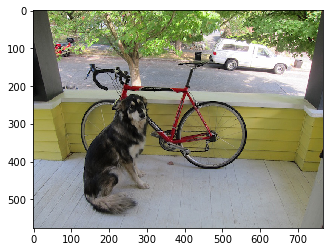

In [5]:
#Visualize image
plt.imshow(image.asnumpy())

In [6]:
#Transform and batch image
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short=512)
print("Image shape", image.shape) # Height X Width X Channel shape
print("Image dtype", image.dtype) # Unsigned 8 bit Integers
print("Image min", image.min().asscalar()) # Minimum pixel value in the image
print("Image max", image.max().asscalar()) # Maximum pixel value in the image

Image shape (1, 3, 512, 683)
Image dtype <class 'numpy.float32'>
Image min -2.117904
Image max 2.64


In [8]:
#Load Model
# YOLO3 model with darknet53 backbone trained on COCO dataset
network = gcv.model_zoo.get_model("yolo3_darknet53_coco", pretrained=True)

100%|████████████████████████████████████████████████████████████████████████| 224190/224190 [01:03<00:00, 3542.40KB/s]


In [9]:
#Make Prediction
prediction = network(image)
print(type(prediction))

<class 'tuple'>


In [11]:
for index, array in enumerate(prediction, start=1):
    print("#{} shape: {}".format(index, array.shape))

#1 shape: (1, 100, 1)
#2 shape: (1, 100, 1)
#3 shape: (1, 100, 4)


1st array = class_indicies

2nd array = probabilities

3rd array = bounding boxes

(1, 100, 1) 

The leftmost argument 1 means 1 batch of image.

The middle argument 100 means mdel can predict upto 100 objects in a single image because that is the number of class in the model.

The rightmost argument 1 means 1 class index per object
                    (4 means 4 points per object for bounding box)

In [13]:
#Unpack prediction
prediction = [array[0] for array in prediction]

class_indicies, probabilities, bounding_box = prediction

In [14]:
#Object Classes
k=10
print(class_indicies[:10]) # -1 class means background object


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [58.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>


In [15]:
# Class labels
class_index = 16
assert class_index > -1
print(network.classes[class_index])

dog


In [16]:
# Object probabilities
print(probabilities[:k])


[[ 0.9922735 ]
 [ 0.9646551 ]
 [ 0.6890225 ]
 [ 0.23493566]
 [ 0.01805791]
 [ 0.01063583]
 [ 0.01027774]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [17]:
# Object Bounding Box
print(bounding_box[:k])


[[116.383095 201.52264  281.88876  482.33264 ]
 [ 94.039536 107.238785 504.9234   376.52264 ]
 [417.18365   69.68814  614.6805   149.04832 ]
 [417.18365   69.68814  614.6805   149.04832 ]
 [ 91.04436  124.79436  504.3833   403.57733 ]
 [532.793     92.20426  547.2879   104.81126 ]
 [ 51.13083   68.55553   95.09497  111.617294]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


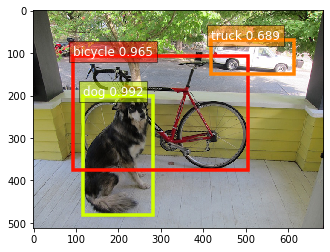

In [19]:
# Visualize Prediction
gcv.utils.viz.plot_bbox(chw_image, \
                        bounding_box, \
                        probabilities, \
                        class_indicies, \
                       class_names=network.classes)